In [11]:
import sys
# sys.stdout = open('logfile_geolife', 'w')
sys.path.append('..')

import attack
import data_loader as dl

In [12]:
import geopandas as gp
import pandas as pd
from tqdm import tqdm
import numpy as np
import libpysal
import itertools
from joblib import Parallel, delayed
import random
import matplotlib.pyplot as plt

In [28]:
# Load preprocessed data 
raw_full_trip_gdf, raw_trip_sp_gdf, raw_trip_ep_gdf, tesselation_gdf = dl.load_geolife(data_type='raw', 
                                                                                       min_n_trips_per_user=1,
                                                                                       rand_n_week_period=None,
                                                                                       tessellation_diameter=300,
                                                                                       min_trip_length=200,
                                                                                       min_nr_points=50,
                                                                                       only_2008=True)
assert len(raw_full_trip_gdf) == len(raw_trip_sp_gdf) == len(raw_trip_ep_gdf)

Reading raw geolife geojson file...
Done.
Number of trajectories in loaded dataset: 6016
Number of users in loaded dataset: 73


In [23]:
from scipy.spatial import distance

def detect_jumps(linestring, jump_dist=1000):
    for i, p in enumerate(linestring.coords):
        if i == len(linestring.coords) - 1:
            continue
        if distance.euclidean(linestring.coords[i], linestring.coords[i+1]) > jump_dist:
            return 1
    return 0

raw_full_trip_gdf['JUMP'] = raw_full_trip_gdf.geometry.apply(lambda x: detect_jumps(x))

raw_full_trip_gdf = raw_full_trip_gdf.query('JUMP == 0').copy()
raw_trip_sp_gdf = raw_trip_sp_gdf.query('TRIP_ID in @raw_full_trip_gdf.TRIP_ID').copy()
raw_trip_ep_gdf = raw_trip_ep_gdf.query('TRIP_ID in @raw_full_trip_gdf.TRIP_ID').copy()

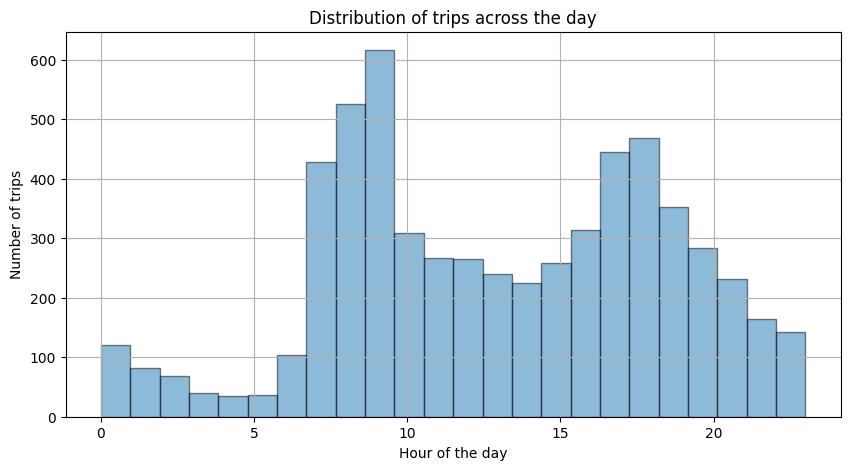

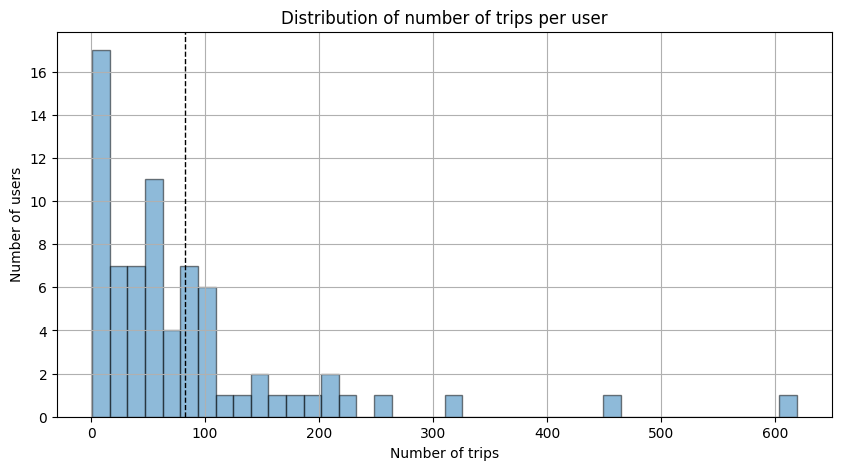

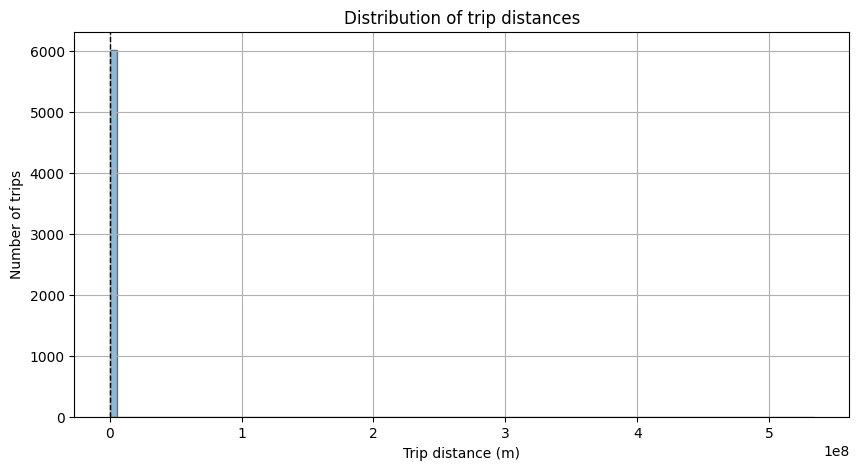

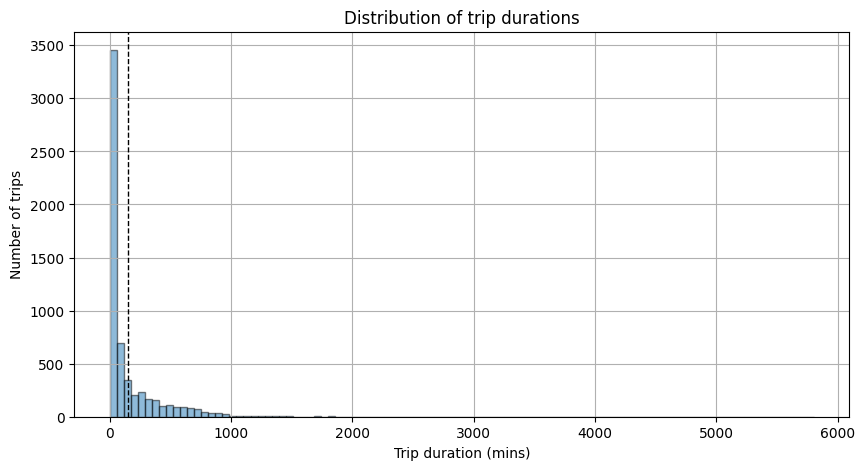


Matching start and end points with tessellation...
Done.

Extracting trips that start and end within tessellation area...
Number of trips that start and end wihin tessellation area: 5493
Number of trips outside and therefore dropped: 523
Done.

Building mapping of trip chains...


100%|███████████████████████████████████████████████████████████████████████████████| 5493/5493 [01:29<00:00, 61.49it/s]


Done.

Evaluating trip chaining...
Number of edges (matched) between trips: 654
Number of wrong matches: 185
Done.

Building trip chains...


100%|████████████████████████████████████████████████████████████████████████████| 5493/5493 [00:00<00:00, 29724.58it/s]


Done.

Merging trips...


100%|███████████████████████████████████████████████████████████████████████████████| 5493/5493 [01:03<00:00, 86.93it/s]


Done.
Number of trips that were matched at least once: 5433/5493
Concatenating MERGED and UNMERGED trips...
Done.

Extracting data for concatenated trips...
Done.

Building clustering after concatenation...
Number of unique clusters: 4899
Done.

Building HL from start points...


/usr/local/lib/python3.8/dist-packages/libpysal/weights/weights.py:172: UserWarning: The weights matrix is not fully connected: 
 There are 173 disconnected components.
 There are 114 islands with ids: 11, 12, 14, 17, 18, 19, 30, 31, 32, 33, 34, 36, 48, 77, 78, 79, 126, 152, 166, 198, 233, 238, 239, 240, 247, 253, 254, 255, 373, 603, 654, 792, 881, 891, 892, 893, 904, 974, 978, 984, 997, 1002, 1003, 1022, 1036, 1037, 1038, 1039, 1042, 1045, 1046, 1050, 1082, 1092, 1093, 1094, 1096, 1097, 1102, 1103, 1104, 1111, 1113, 1118, 1121, 1127, 1128, 1129, 1134, 1139, 1140, 1141, 1142, 1146, 1147, 1181, 1216, 1228, 1229, 1230, 1232, 1296, 1297, 1300, 1301, 1302, 1311, 1317, 1318, 1319, 1322, 1323, 1325, 1326, 1337, 1338, 1456, 1457, 1458, 1459, 1460, 1463, 1475, 1476, 1478, 1485, 1486, 1487, 1488, 1489, 1490, 1491, 1519, 1524.
  warnings.warn(message)


Done.

Building HL from end points...


/usr/local/lib/python3.8/dist-packages/libpysal/weights/weights.py:172: UserWarning: The weights matrix is not fully connected: 
 There are 212 disconnected components.
 There are 129 islands with ids: 0, 1, 6, 11, 14, 15, 16, 17, 25, 28, 29, 30, 34, 35, 36, 39, 40, 41, 53, 54, 55, 56, 57, 58, 70, 74, 75, 107, 108, 136, 137, 146, 236, 238, 287, 378, 381, 407, 420, 432, 489, 586, 587, 590, 640, 641, 692, 693, 973, 1125, 1257, 1266, 1304, 1324, 1381, 1382, 1389, 1428, 1511, 1524, 1533, 1538, 1580, 1605, 1606, 1608, 1612, 1614, 1616, 1617, 1619, 1623, 1625, 1630, 1666, 1689, 1690, 1691, 1715, 1720, 1726, 1731, 1732, 1733, 1741, 1744, 1745, 1746, 1754, 1755, 1756, 1757, 1758, 1759, 1761, 1762, 1763, 1764, 1765, 1773, 1777, 1805, 1842, 1881, 1921, 1922, 1989, 2003, 2008, 2009, 2010, 2035, 2040, 2043, 2044, 2046, 2053, 2054, 2072, 2196, 2197, 2199, 2203, 2204, 2219, 2225, 2226, 2227, 2265.
  warnings.warn(message)


Done.

Combining HL from start points and end points...


/usr/local/lib/python3.8/dist-packages/libpysal/weights/weights.py:172: UserWarning: The weights matrix is not fully connected: 
 There are 276 disconnected components.
 There are 176 islands with ids: 0, 1, 6, 13, 15, 16, 17, 28, 29, 30, 34, 36, 39, 40, 41, 53, 55, 56, 57, 58, 72, 541, 542, 560, 624, 625, 632, 658, 720, 738, 1368, 1371, 1372, 1373, 1374, 1375, 1377, 1378, 1418, 1459, 1481, 1522, 1523, 1575, 1590, 1593, 1597, 1612, 1613, 1616, 1617, 1621, 1625, 1626, 1630, 1710, 1711, 1712, 1715, 1720, 1727, 1731, 1733, 1744, 1745, 1746, 1754, 1755, 1756, 1757, 1758, 1762, 1765, 1766, 1823, 1828, 1920, 1922, 1923, 2006, 2007, 2008, 2009, 2010, 2039, 2040, 2044, 2047, 2053, 2195, 2197, 2202, 2203, 2204, 2219, 2225, 2265, 2278, 2283, 2296, 2297, 2299, 2305, 2885, 2902, 2903, 2930, 2983, 2996, 3020, 3022, 3023, 3024, 3025, 3134, 3135, 3253, 3254, 3255, 3278, 3284, 3290, 3305, 3342, 3343, 3344, 3348, 3366, 3367, 3369, 3370, 3379, 3380, 3381, 3382, 3383, 3386, 3387, 3394, 3395, 3430, 3432, 

Number of users for which at least on Home Location has been identified:  73
Number of unique HL tiles: 276
Done.

Matching trips to HL...
Number of unmatched trajectories (concatenated) that do neither start nor end in a HL tile: 136/4899
Number of trajectories (concatenated) that start AND end in a HL tile: 3501/4899
Number of trips that match different HL tiles with their SP and EP: 1345
Done.

Matching double assigned trips to unique HL...


[Parallel(n_jobs=-4)]: Using backend LokyBackend with 125 concurrent workers.
[Parallel(n_jobs=-4)]: Done 201 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-4)]: Done 551 tasks      | elapsed:  8.9min
[Parallel(n_jobs=-4)]: Done 1001 tasks      | elapsed: 16.7min
[Parallel(n_jobs=-4)]: Done 1551 tasks      | elapsed: 25.8min
[Parallel(n_jobs=-4)]: Done 2201 tasks      | elapsed: 33.9min
[Parallel(n_jobs=-4)]: Done 2690 out of 2690 | elapsed: 54.3min finished


All scores are 0.0, assigning -1 as best_hl_id!
All scores are 0.0, assigning -1 as best_hl_id!
All scores are 0.0, assigning -1 as best_hl_id!
All scores are 0.0, assigning -1 as best_hl_id!
All scores are 0.0, assigning -1 as best_hl_id!
All scores are 0.0, assigning -1 as best_hl_id!
All scores are 0.0, assigning -1 as best_hl_id!
Done.

Getting trajectories that happened during the same time...


[Parallel(n_jobs=-4)]: Using backend LokyBackend with 125 concurrent workers.
[Parallel(n_jobs=-4)]: Done 201 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-4)]: Done 551 tasks      | elapsed:  6.7min
[Parallel(n_jobs=-4)]: Done 1001 tasks      | elapsed: 11.9min
[Parallel(n_jobs=-4)]: Done 1551 tasks      | elapsed: 18.3min
[Parallel(n_jobs=-4)]: Done 2201 tasks      | elapsed: 25.9min
[Parallel(n_jobs=-4)]: Done 2951 tasks      | elapsed: 34.5min
[Parallel(n_jobs=-4)]: Done 3801 tasks      | elapsed: 44.4min
[Parallel(n_jobs=-4)]: Done 4899 out of 4899 | elapsed: 57.1min finished


Done.

Building clustering after HL matching step...


  0%|                                                                                           | 0/146 [00:00<?, ?it/s][Parallel(n_jobs=-4)]: Using backend LokyBackend with 125 concurrent workers.


Running randomized subset search for 1000 iterations with 2986 trajectories...


[Parallel(n_jobs=-4)]: Done 200 tasks      | elapsed:   12.8s
[Parallel(n_jobs=-4)]: Done 550 tasks      | elapsed:   28.8s
[Parallel(n_jobs=-4)]: Done 1000 out of 1000 | elapsed:   53.5s finished


Done. Length of longest subset:  103


  2%|█▋                                                                                 | 3/146 [00:53<42:43, 17.93s/it][Parallel(n_jobs=-4)]: Using backend LokyBackend with 125 concurrent workers.


Running randomized subset search for 1000 iterations with 38 trajectories...


[Parallel(n_jobs=-4)]: Done 200 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-4)]: Done 1000 out of 1000 | elapsed:    2.6s finished
  3%|██▎                                                                                | 4/146 [00:56<30:51, 13.04s/it][Parallel(n_jobs=-4)]: Using backend LokyBackend with 125 concurrent workers.


Done. Length of longest subset:  38
Running randomized subset search for 1000 iterations with 158 trajectories...


[Parallel(n_jobs=-4)]: Done 200 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-4)]: Done 1000 out of 1000 | elapsed:    4.0s finished


Done. Length of longest subset:  96


  3%|██▊                                                                                | 5/146 [01:00<24:05, 10.25s/it][Parallel(n_jobs=-4)]: Using backend LokyBackend with 125 concurrent workers.


Running randomized subset search for 1000 iterations with 181 trajectories...


[Parallel(n_jobs=-4)]: Done 201 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-4)]: Done 1000 out of 1000 | elapsed:    6.8s finished


Done. Length of longest subset:  158


  5%|████▌                                                                              | 8/146 [01:08<13:13,  5.75s/it][Parallel(n_jobs=-4)]: Using backend LokyBackend with 125 concurrent workers.


Running randomized subset search for 1000 iterations with 44 trajectories...


[Parallel(n_jobs=-4)]: Done 200 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-4)]: Done 1000 out of 1000 | elapsed:    2.1s finished
  8%|██████▏                                                                           | 11/146 [01:10<07:50,  3.48s/it][Parallel(n_jobs=-4)]: Using backend LokyBackend with 125 concurrent workers.


Done. Length of longest subset:  44
Running randomized subset search for 1000 iterations with 32 trajectories...


[Parallel(n_jobs=-4)]: Done 200 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-4)]: Done 1000 out of 1000 | elapsed:    2.3s finished
  8%|██████▋                                                                           | 12/146 [01:12<07:21,  3.30s/it][Parallel(n_jobs=-4)]: Using backend LokyBackend with 125 concurrent workers.


Done. Length of longest subset:  32
Running randomized subset search for 1000 iterations with 65 trajectories...


[Parallel(n_jobs=-4)]: Done 200 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-4)]: Done 1000 out of 1000 | elapsed:    3.4s finished


Done. Length of longest subset:  64


  9%|███████▎                                                                          | 13/146 [01:16<07:28,  3.37s/it][Parallel(n_jobs=-4)]: Using backend LokyBackend with 125 concurrent workers.


Running randomized subset search for 1000 iterations with 68 trajectories...


[Parallel(n_jobs=-4)]: Done 200 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-4)]: Done 1000 out of 1000 | elapsed:    3.7s finished


Done. Length of longest subset:  68


 12%|█████████▌                                                                        | 17/146 [01:20<04:30,  2.10s/it][Parallel(n_jobs=-4)]: Using backend LokyBackend with 125 concurrent workers.


Running randomized subset search for 1000 iterations with 54 trajectories...


[Parallel(n_jobs=-4)]: Done 200 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-4)]: Done 1000 out of 1000 | elapsed:    3.4s finished
 14%|███████████▏                                                                      | 20/146 [01:23<03:43,  1.77s/it]

Done. Length of longest subset:  54


 16%|█████████████▍                                                                    | 24/146 [01:23<02:09,  1.06s/it][Parallel(n_jobs=-4)]: Using backend LokyBackend with 125 concurrent workers.


Running randomized subset search for 1000 iterations with 273 trajectories...


[Parallel(n_jobs=-4)]: Done 200 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-4)]: Done 751 out of 1000 | elapsed:    6.9s remaining:    2.3s
[Parallel(n_jobs=-4)]: Done 1000 out of 1000 | elapsed:    9.6s finished


Done. Length of longest subset:  161


 18%|██████████████▌                                                                   | 26/146 [01:34<03:54,  1.96s/it][Parallel(n_jobs=-4)]: Using backend LokyBackend with 125 concurrent workers.


Running randomized subset search for 1000 iterations with 43 trajectories...


[Parallel(n_jobs=-4)]: Done 200 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-4)]: Done 1000 out of 1000 | elapsed:    2.1s finished
 20%|████████████████▎                                                                 | 29/146 [01:36<03:02,  1.56s/it]

Done. Length of longest subset:  43


 43%|███████████████████████████████████▍                                              | 63/146 [01:36<00:16,  5.03it/s][Parallel(n_jobs=-4)]: Using backend LokyBackend with 125 concurrent workers.


Running randomized subset search for 1000 iterations with 49 trajectories...


[Parallel(n_jobs=-4)]: Done 200 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-4)]: Done 1000 out of 1000 | elapsed:    2.2s finished
 48%|███████████████████████████████████████▎                                          | 70/146 [01:38<00:18,  4.19it/s]

Done. Length of longest subset:  49
Running randomized subset search for 1000 iterations with 63 trajectories...


[Parallel(n_jobs=-4)]: Using backend LokyBackend with 125 concurrent workers.
[Parallel(n_jobs=-4)]: Done 200 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-4)]: Done 1000 out of 1000 | elapsed:    3.1s finished
 57%|██████████████████████████████████████████████▌                                   | 83/146 [01:42<00:15,  4.10it/s]

Done. Length of longest subset:  45


 70%|████████████████████████████████████████████████████████▌                        | 102/146 [01:42<00:05,  7.55it/s][Parallel(n_jobs=-4)]: Using backend LokyBackend with 125 concurrent workers.


Running randomized subset search for 1000 iterations with 110 trajectories...


[Parallel(n_jobs=-4)]: Done 200 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-4)]: Done 1000 out of 1000 | elapsed:    6.3s finished


Done. Length of longest subset:  110


 78%|███████████████████████████████████████████████████████████████▏                 | 114/146 [01:49<00:08,  3.86it/s][Parallel(n_jobs=-4)]: Using backend LokyBackend with 125 concurrent workers.


Running randomized subset search for 1000 iterations with 147 trajectories...


[Parallel(n_jobs=-4)]: Done 200 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-4)]: Done 550 tasks      | elapsed:    6.7s
[Parallel(n_jobs=-4)]: Done 1000 out of 1000 | elapsed:   10.9s finished


Done. Length of longest subset:  147


100%|█████████████████████████████████████████████████████████████████████████████████| 146/146 [02:00<00:00,  1.21it/s]


Done.

Clustering results after concatenation step:
Number of unique clusters: 4899
Homogeneity: 0.990
Completeness: 0.437
V-measure: 0.607
Rand index: 0.966
ARI: 0.002
MI: 3.695
NMI: 0.607
AMI: 0.046
Cluster accuracy: 0.024

Clustering results after HL matching step:
Number of unique clusters: 3387
Homogeneity: 0.931
Completeness: 0.483
V-measure: 0.636
Rand index: 0.968
ARI: 0.170
MI: 3.476
NMI: 0.636
AMI: 0.295
Cluster accuracy: 0.220


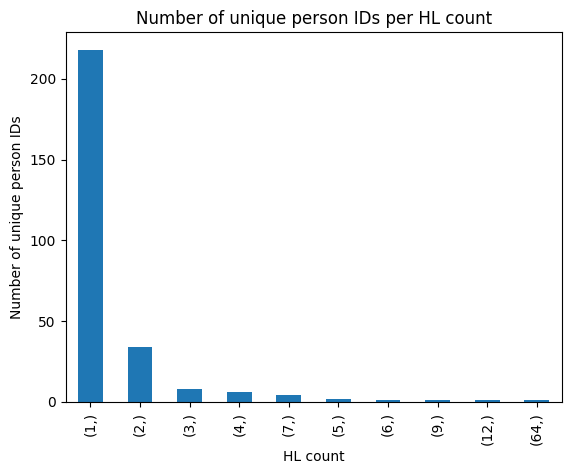

In [29]:
# Parameters
LCSS_EPS = 200
LCSS_FLIP = True

HL_SP_START_TIME = '6:00'
HL_SP_END_TIME = '10:00'
HL_EP_START_TIME = '18:00'
HL_EP_END_TIME = '0:00'

CHAINING_INFLOW_HR_DIFF_THRESHOLD = 4
CHAINING_HR_DIFF_THRESHOLD = 8

HL_SP_OUTFLOW_THRESHOLD = 2
HL_EP_OUTFLOW_THRESHOLD = 4

RANDOMIZED_SIMULTANEOUS_SEARCH_ITERATIONS = 1000

SIM_THRESH_FOR_NO_MATCH_TRIPS = 0.5

# JSD Parameters
GRID_RESOLUTION_JSD = 1000

attack.plot_hour_of_day_distribution(raw_full_trip_gdf)
attack.plot_distribution_of_number_of_trips_per_user(raw_full_trip_gdf)
attack.plot_distribution_of_trip_distances(raw_full_trip_gdf)
attack.plot_distribution_of_trip_durations(raw_full_trip_gdf)

# Merge Start Points (SP) and End Points (EP) with Tessellation
print("\nMatching start and end points with tessellation...")
gdf_sp, gdf_ep = attack.match_boundary_points_with_tessellation(raw_trip_sp_gdf, raw_trip_ep_gdf, tesselation_gdf)
print("Done.")

# Extract Full Trips that Start and End within Tessellation Area
print("\nExtracting trips that start and end within tessellation area...")
full_trip_gdf, trip_sp_gdf, trip_ep_gdf, gdf_sp, gdf_ep = attack.extract_trips_that_start_end_in_tessellation(raw_full_trip_gdf, raw_trip_sp_gdf, raw_trip_ep_gdf, gdf_sp, gdf_ep)
print("Done.")

# Build mapping of trip chains
print('\nBuilding mapping of trip chains...')
mapping_cont_trips = attack.build_trip_chain_mapping(gdf_sp, gdf_ep)
print('Done.')

# Evaluate Trip Chaining
print('\nEvaluating trip chaining...')
attack.evaluate_trip_chaining(mapping_cont_trips, full_trip_gdf)
print('Done.')

# Concatenate Trips
full_trips_concat_gdf, trip_concat_dict = attack.merge_trips_from_matching(gdf_sp, mapping_cont_trips, full_trip_gdf)

# Extract data for concatenated trips
print('\nExtracting data for concatenated trips...')
gdf_sp_concat, trip_sp_gdf_concat, gdf_ep_concat, trip_ep_gdf_concat = attack.extract_concatenated_trips(full_trips_concat_gdf, gdf_sp, trip_sp_gdf, gdf_ep, trip_ep_gdf)
print('Done.')

# Build Clustering after Concatenation step
print('\nBuilding clustering after concatenation...')
clustering_concat = attack.build_clustering_after_concatenation(full_trips_concat_gdf, trip_concat_dict, full_trip_gdf)
print('Done.')

# Build Home Locations (HL)
# Build HL from Start Points
print('\nBuilding HL from start points...')
gdf_hl_combined_sp = attack.build_hl_from_start_points(gdf_sp, gdf_ep, HL_SP_OUTFLOW_THRESHOLD=HL_SP_OUTFLOW_THRESHOLD)
print('Done.')
# Build HL from End Points
print('\nBuilding HL from end points...')
gdf_hl_combined_ep = attack.build_hl_from_end_points(gdf_sp, gdf_ep, HL_EP_OUTFLOW_THRESHOLD=HL_EP_OUTFLOW_THRESHOLD)
print('Done.')
# Combine HL from Start Points and End Points
print('\nCombining HL from start points and end points...')
gp_combined, HL_table = attack.concatenate_hl(gdf_hl_combined_sp, gdf_hl_combined_ep)
print('Done.')

print('\nMatching trips to HL...')
HL_table_se_concat, unmatched_trips, double_assigned_trips, nr_unmatched = attack.match_trips_to_HL(gp_combined, HL_table, trip_sp_gdf_concat, trip_ep_gdf_concat, full_trips_concat_gdf)
print('Done.')

print('\nMatching double assigned trips to unique HL...')
HL_table_trips_concat = attack.assign_double_matched_trips_to_unique_hl(HL_table_se_concat, full_trips_concat_gdf, unmatched_trips, double_assigned_trips, nr_unmatched)
print('Done.')

# Get trajectories that happened during the same time
print('\nGetting trajectories that happened during the same time...')
full_trips_concat_gdf_overlap_dict = attack.getTripOverlaps(full_trips_concat_gdf)
print('Done.')

# Build Clustering after HL matching step
print('\nBuilding clustering after HL matching step...')
clustering_after_HL, HL_table_dict = attack.build_clustering_after_HL_assignment(HL_table_trips_concat, full_trip_gdf, trip_concat_dict, full_trips_concat_gdf_overlap_dict)
print('Done.')

# Evaluate clustering Results
print("\nClustering results after concatenation step:")
print(f"Number of unique clusters: {len(set(clustering_concat))}")
attack.evaluate(clustering_concat, full_trip_gdf)
clustering_HL = list(dict(sorted(clustering_after_HL.items())).values())
print("\nClustering results after HL matching step:")
print(f"Number of unique clusters: {len(set(clustering_HL))}")
attack.evaluate(clustering_HL, full_trip_gdf)

In [ ]:
full_trip_gdf = full_trip_gdf.copy()
full_trip_gdf['clustering_HL'] = clustering_HL
full_trip_gdf.to_file('../data/geolife/geolife_clustering_HL.geojson', driver="GeoJSON")

In [ ]:
attack.run_full_attack(raw_full_trip_gdf, raw_trip_sp_gdf, raw_trip_ep_gdf, tesselation_gdf, city='beijing')

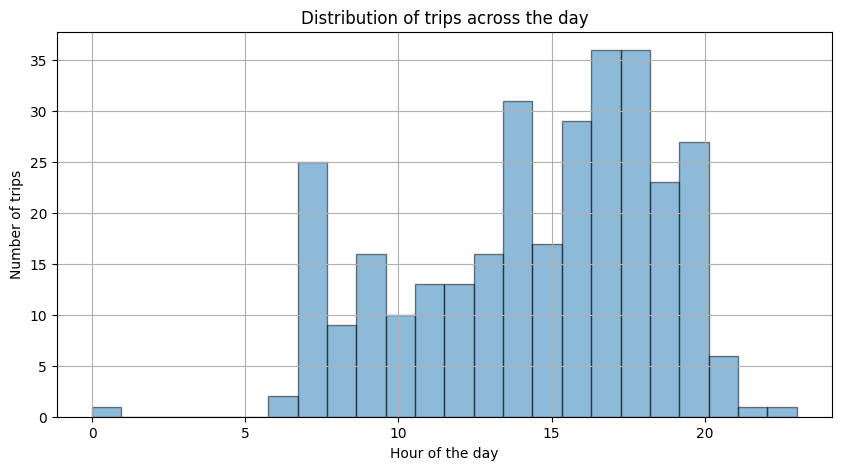

In [6]:
# plot hour of day distribution of TRIP_START
attack.plot_hour_of_day_distribution(raw_full_trip_gdf)

# Merge Start Points (SP) and End Points (EP) with Tessellation

In [7]:
gdf_sp, gdf_ep = attack.match_boundary_points_with_tessellation(raw_trip_sp_gdf, raw_trip_ep_gdf, tesselation_gdf)

# Extract Full Trips that Start and End within Tessellation Area

In [8]:
full_trip_gdf, trip_sp_gdf, trip_ep_gdf, gdf_sp, gdf_ep = attack.extract_trips_that_start_end_in_tessellation(raw_full_trip_gdf, raw_trip_sp_gdf, raw_trip_ep_gdf, gdf_sp, gdf_ep)


Number of trips that start and end wihin tessellation area: 290
Number of trips outside and therefore dropped: 22


## Build mapping of trip chains

In [9]:
mapping_cont_trips = attack.build_trip_chain_mapping(gdf_sp, gdf_ep)

100%|██████████| 290/290 [00:05<00:00, 57.81it/s]


In [10]:
attack.evaluate_trip_chaining(mapping_cont_trips, full_trip_gdf)

Number of edges (matched) between trips: 73
Number of wrong matches: 0


## Merge trips according to matching

In [11]:
full_trips_concat_gdf, trip_concat_dict = attack.merge_trips_from_matching(gdf_sp, mapping_cont_trips, full_trip_gdf)


Building trip chains...


100%|██████████| 290/290 [00:00<00:00, 96704.42it/s]


Done.

Merging trips...


100%|██████████| 290/290 [00:04<00:00, 65.87it/s]

Done.
Number of trips that were matched at least once: 289/290
Concatenating MERGED and UNMERGED trips...
Done.


In [12]:
gdf_sp_concat, trip_sp_gdf_concat, gdf_ep_concat, trip_ep_gdf_concat = attack.extract_concatenated_trips(full_trips_concat_gdf, gdf_sp, trip_sp_gdf, gdf_ep, trip_ep_gdf)

## Build Clustering after Concatenation Step

In [13]:
clustering_concat = attack.build_clustering_after_concatenation(full_trips_concat_gdf, trip_concat_dict, full_trip_gdf)

Number of unique clusters: 218


# Build Home Locations (HL)

## From Start Points (SPs)

We use the SP-tessellation matching that still contains all SP (and potential HL), and not just the SP and EP of the concatenated trips. We do this, because we do not want loose potential HL contributed of substrip concatenated in a chain.

In [14]:
gdf_hl_combined_sp = attack.build_hl_from_start_points(gdf_sp)

c:\Users\Bened\Documents\Git\Master-Thesis\env\lib\site-packages\libpysal\weights\weights.py:172: UserWarning: The weights matrix is not fully connected: 
 There are 16 disconnected components.
 There are 9 islands with ids: 12, 14, 15, 18, 20, 26, 27, 49, 51.
  warnings.warn(message)


## From End Points (EPs)

In [15]:
gdf_hl_combined_ep = attack.build_hl_from_end_points(gdf_ep)

c:\Users\Bened\Documents\Git\Master-Thesis\env\lib\site-packages\libpysal\weights\weights.py:172: UserWarning: The weights matrix is not fully connected: 
 There are 32 disconnected components.
 There are 24 islands with ids: 5, 28, 29, 30, 38, 39, 40, 41, 42, 49, 50, 53, 54, 58, 59, 60, 63, 64, 73, 74, 79, 110, 111, 112.
  warnings.warn(message)


## Merge (concatenate)

c:\Users\Bened\Documents\Git\Master-Thesis\env\lib\site-packages\libpysal\weights\weights.py:172: UserWarning: The weights matrix is not fully connected: 
 There are 40 disconnected components.
 There are 29 islands with ids: 15, 55, 56, 58, 59, 60, 61, 62, 70, 71, 76, 77, 102, 103, 104, 105, 106, 107, 108, 109, 111, 112, 149, 151, 152, 153, 158, 159, 164.
  warnings.warn(message)


Number of users for which at least on Home Location has been identified:  5
Number of unique HL tiles: 40


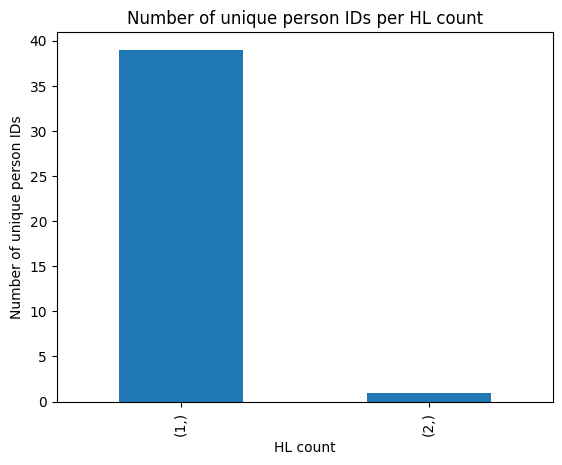

In [16]:
gp_combined, HL_table = attack.concatenate_hl(gdf_hl_combined_sp, gdf_hl_combined_ep)

# Match trips with Home Location tiles

## Match concatenated trips

In [17]:
HL_table_se_concat, unmatched_trips, double_assigned_trips, nr_unmatched = attack.match_trips_to_HL(gp_combined, HL_table, trip_sp_gdf_concat, trip_ep_gdf_concat, full_trips_concat_gdf)

Number of unmatched trajectories (concatenated) that do neither start nor end in a HL tile: 10/218
Number of trajectories (concatenated) that start AND end in a HL tile: 74/218
Number of trips that match different HL tiles with their SP and EP: 44


## Assign double matched trips to one unique HL

Iterate over all double matched trips and compare them to all other trips that are uniquely assigned in their respective potential HLs that they have been matched with. Then take the HL with the single maximum lcss score between the trip under question and any trip of the assigned HL tiles.

In [18]:
HL_table_trips_concat = attack.assign_double_matched_trips_to_unique_hl(HL_table_se_concat, full_trips_concat_gdf, unmatched_trips, double_assigned_trips, nr_unmatched)


## Get trajectories that happened during the same time

In [19]:
full_trips_concat_gdf_overlap_dict = attack.getTripOverlaps(full_trips_concat_gdf)

## Create clustering after HL assignment step

In [20]:
clustering_after_HL, HL_table_dict = attack.build_clustering_after_HL_assignment(HL_table_trips_concat, full_trip_gdf, trip_concat_dict, full_trips_concat_gdf_overlap_dict)

  0%|          | 0/26 [00:00<?, ?it/s]

Running randomized subset search for 200 iterations with 37 trajectories...


 12%|█▏        | 3/26 [00:00<00:05,  4.39it/s]

Done. Length of longest subset:  37
Running randomized subset search for 200 iterations with 59 trajectories...


 42%|████▏     | 11/26 [00:01<00:02,  5.87it/s]

Done. Length of longest subset:  59
Running randomized subset search for 200 iterations with 45 trajectories...


100%|██████████| 26/26 [00:02<00:00, 10.46it/s]

Done. Length of longest subset:  45


In [21]:
print("Clustering results after concatenation step:")
print(f"Number of unique clusters: {len(set(clustering_concat))}")
attack.evaluate(clustering_concat, full_trip_gdf)

clustering_HL = list(dict(sorted(clustering_after_HL.items())).values())
print("\nClustering results after HL matching step:")
print(f"Number of unique clusters: {len(set(clustering_HL))}")
attack.evaluate(clustering_HL, full_trip_gdf)

Clustering results after concatenation step:
Number of unique clusters: 218
Homogeneity: 1.000
Completeness: 0.182
V-measure: 0.308
Rand index: 0.534
ARI: 0.005
MI: 0.963
NMI: 0.308
AMI: 0.081

Clustering results after HL matching step:
Number of unique clusters: 34
Homogeneity: 0.974
Completeness: 0.414
V-measure: 0.581
Rand index: 0.697
ARI: 0.368
MI: 0.938
NMI: 0.581
AMI: 0.541


## Try to Assign Trips Without Match

In [22]:
clustering_after_double_assign_HL = attack.assign_trips_without_match(
    clustering_after_HL, HL_table_dict, 
    full_trips_concat_gdf, 
    full_trips_concat_gdf_overlap_dict, 
    full_trip_gdf, 
    trip_concat_dict)


Comparing trips that were not assigned to any HL_ID with trips that were assigned to a HL_ID...


 10%|█         | 1/10 [00:05<00:46,  5.11s/it]

no match and assign new cluster id 35 to trips 11 100


 20%|██        | 2/10 [00:08<00:30,  3.82s/it]

LCSS scores too low to match


 30%|███       | 3/10 [00:10<00:23,  3.35s/it]

existing match and assign cluster id 2.0 to trip 262


 40%|████      | 4/10 [00:15<00:22,  3.78s/it]

existing match and assign cluster id 2.0 to trip 255


 50%|█████     | 5/10 [00:19<00:19,  4.00s/it]

existing match and assign cluster id 6.0 to trip 253


 60%|██████    | 6/10 [00:20<00:11,  2.94s/it]

existing match and assign cluster id 2.0 to trip 1


 70%|███████   | 7/10 [00:23<00:08,  2.89s/it]

existing match and assign cluster id 5.0 to trip 51
There are two or more HL_IDs with the same LCSS score. Looking for second highest LCSS score...
Candidate HL_IDs: [-1.0, 15.0, 17.0]


 80%|████████  | 8/10 [00:29<00:07,  3.81s/it]

There is a unique highest score
The highest score is 1.0 and the best_hl_id is 15.0
existing match and assign cluster id 15.0 to trip 64
There are two or more HL_IDs with the same LCSS score. Looking for second highest LCSS score...
Candidate HL_IDs: [15.0, 18.0]


100%|██████████| 10/10 [00:30<00:00,  3.04s/it]

There is a unique highest score
The highest score is 1.0 and the best_hl_id is 15.0
existing match and assign cluster id 15.0 to trip 101
Done.
Assigning clustering IDs to all trips that are part of a new cluster...
Done.


In [23]:
print("Clustering results after concatenation step:")
print(f"Number of unique clusters: {len(set(clustering_concat))}")
attack.evaluate(clustering_concat, full_trip_gdf)

print("\nClustering results after HL matching step:")
print(f"Number of unique clusters: {len(set(list(dict(sorted(clustering_after_HL.items())).values())))}")
attack.evaluate(list(dict(sorted(clustering_after_HL.items())).values()), full_trip_gdf)

print("\nClustering results after double assign HL step:")
print(f"Number of unique clusters: {len(set(list(dict(sorted(clustering_after_double_assign_HL.items())).values())))}")
attack.evaluate(list(dict(sorted(clustering_after_double_assign_HL.items())).values()), full_trip_gdf)

Clustering results after concatenation step:
Number of unique clusters: 218
Homogeneity: 1.000
Completeness: 0.182
V-measure: 0.308
Rand index: 0.534
ARI: 0.005
MI: 0.963
NMI: 0.308
AMI: 0.081

Clustering results after HL matching step:
Number of unique clusters: 34
Homogeneity: 0.974
Completeness: 0.414
V-measure: 0.581
Rand index: 0.697
ARI: 0.368
MI: 0.938
NMI: 0.581
AMI: 0.541

Clustering results after double assign HL step:
Number of unique clusters: 27
Homogeneity: 0.950
Completeness: 0.422
V-measure: 0.584
Rand index: 0.702
ARI: 0.378
MI: 0.915
NMI: 0.584
AMI: 0.551


In [32]:
attack.store_results(clustering_concat, list(dict(sorted(clustering_after_HL.items())).values()), list(dict(sorted(clustering_after_double_assign_HL.items())).values()), full_trip_gdf)